In [5]:
import os
import sys

sys.path.append("/src/")
os.chdir("/src/")

In [6]:
# Reading the content from the given path and storing it in a variable

file_path = "config/prompts/prompt_travel.json"

content = ""
with open(file_path, "r") as file:
    content = file.read()
content

'{\n  "name": "sample",\n  "path": "share/Stable-diffusion/toonyou_beta3.safetensors",\n  "motion_module": "models/motion-module/mm_sd_v15_v2.ckpt",\n  "compile": false,\n  "seed": [\n    341774366206100\n  ],\n  "scheduler": "k_dpmpp_sde",\n  "steps": 20,\n  "guidance_scale": 10,\n  "clip_skip": 2,\n  "prompt_fixed_ratio": 0.5,\n  "head_prompt": "masterpiece, best quality, a beautiful and detailed portriat of muffet, monster girl,((purple body:1.3)),humanoid, arachnid, anthro,((fangs)),pigtails,hair bows,5 eyes,spider girl,6 arms,solo",\n  "prompt_map": {\n    "0": "smile standing,((spider webs:1.0))",\n    "32": "(((walking))),((spider webs:1.0))",\n    "64": "(((running))),((spider webs:2.0)),wide angle lens, fish eye effect",\n    "96": "(((sitting))),((spider webs:1.0))"\n  },\n  "tail_prompt": "clothed, open mouth, awesome and detailed background, holding teapot, holding teacup, 6 hands,detailed hands,storefront that sells pastries and tea,bloomers,(red and black clothing),inside

In [8]:
# Prediction interface for Cog ⚙️
# https://github.com/replicate/cog/blob/main/docs/python.md

import os
import subprocess
from cog import BasePredictor, Input, Path


class Predictor(BasePredictor):
    def setup(self) -> None:
        """Load the model into memory to make running multiple predictions efficient"""
        pass

    def predict(
        self,
        prompt_travel_json: str = Input(
            description="Hacky way to funnel info into `config/prompts/prompt_travel.json`",
            default="",
        ),
        frames: int = Input(
            description="Length of the video in frames (playback is at 8 fps e.g. 16 frames @ 8 fps is 2 seconds)",
            default=128,
            ge=1,
            le=1024,
        ),
        width: int = Input(
            description="Width of generated video in pixels",
            default=256,
            ge=64,
            le=2160,
        ),
        height: int = Input(
            description="Height of generated video in pixels",
            default=384,
            ge=64,
            le=2160,
        ),
        context: int = Input(
            description="Number of frames to condition on (default: max of <length> or 32). max for motion module v1 is 24",
            default=16,
            ge=1,
            le=32,
        ),
    ) -> Path:
        """Run a single prediction on the model"""

        save_path = (
            "config/prompts/prompt_travel.json"
            if not prompt_travel_json
            else "config/prompts/custom_prompt_travel.json"
        )
        if prompt_travel_json:
            with open(save_path, "w") as file:
                file.write(prompt_travel_json)

        print("Running animatediff generate command...")

        # Use Popen to execute the command and capture the output in real-time
        process = subprocess.Popen(
            [
                "animatediff",
                "generate",
                "-c",
                str(save_path),
                "-W",
                str(width),
                "-H",
                str(height),
                "-L",
                str(frames),
                "-C",
                str(context),
            ],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
        )

        # Capture the lines of the output and display them
        output_lines = [line for line in iter(process.stdout.readline, "")]
        print("".join(output_lines))

        # Wait for the process to finish
        process.communicate()

        print("Identifying the GIF path from the generated outputs...")

        # Identify the most recently created directory in the 'output/' folder
        recent_dir = max(
            (
                os.path.join("output", d)
                for d in os.listdir("output")
                if os.path.isdir(os.path.join("output", d))
            ),
            key=os.path.getmtime,
        )
        print(f"Identified directory: {recent_dir}")

        # Search for a `.gif` or `.mp4` file inside the identified directory
        media_files = [f for f in os.listdir(recent_dir) if f.endswith((".gif", ".mp4"))]

        if not media_files:
            raise ValueError(f"No GIF or MP4 files found in directory: {recent_dir}")

        # Get the full path of the media file (either GIF or MP4)
        media_path = os.path.join(recent_dir, media_files[0])
        print(f"Identified Media Path: {media_path}")

        # Return the path to the found media file
        return Path(media_path)

In [9]:
p = Predictor()
p.setup()

Obtaining file:///src
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for animatediff (pyproject.toml): started
  Building editable for animatediff (pyproject.toml): finished with status 'done'
  Created wheel for animatediff: filename=animatediff-0.1.dev173+g9afb7f6.d20231016-0.editable-py3-none-any.whl size=6473 sha256=91255c0e37aec7e542193825b2ec1385f495509dd71cb299420a0a1c3742f337
  Stored in directory: /tmp/pip-ephem-wheel-cache-9uecrru7/wheels/5c/9b/23/f031c1877ee9aa5bf3ddc51ccc1ac38428d83c5d6eec32a03f
Successfully built

Obtaining file:///src
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for animatediff (pyproject.toml): started
  Building editable for animatediff (pyproject.toml): finished with status 'done'
  Created wheel for animatediff: filename=animatediff-0.1.dev173+g9afb7f6.d20231016-0.editable-py3-none-any.whl size=6473 sha256=6ad4f61c48c43521983c11a28aac465c7e62c0002b0e82c3b7b72bb5e5a8fedd
  Stored in directory: /tmp/pip-ephem-wheel-cache-f_w_z68s/wheels/5c/9b/23/f031c1877ee9aa5bf3ddc51ccc1ac38428d83c5d6eec32a03f
Successfully built

Obtaining file:///src
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for animatediff (pyproject.toml): started
  Building editable for animatediff (pyproject.toml): finished with status 'done'
  Created wheel for animatediff: filename=animatediff-0.1.dev173+g9afb7f6.d20231016-0.editable-py3-none-any.whl size=6473 sha256=ea703e62e5e23a814e4eb79a8baf2cbfe22001b408c587c7a98e53d8f7c2c4ef
  Stored in directory: /tmp/pip-ephem-wheel-cache-j_y2dxen/wheels/5c/9b/23/f031c1877ee9aa5bf3ddc51ccc1ac38428d83c5d6eec32a03f
Successfully built

Obtaining file:///src
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for animatediff (pyproject.toml): started
  Building editable for animatediff (pyproject.toml): finished with status 'done'
  Created wheel for animatediff: filename=animatediff-0.1.dev173+g9afb7f6.d20231016-0.editable-py3-none-any.whl size=6473 sha256=6811b0cc4546375e0cfe0b33d2bada555b551b8faad5ba04f35290c8a3e57405
  Stored in directory: /tmp/pip-ephem-wheel-cache-ly7s6kr3/wheels/5c/9b/23/f031c1877ee9aa5bf3ddc51ccc1ac38428d83c5d6eec32a03f
Successfully built

In [12]:
gif = p.predict(prompt_travel_json=content)

Running animatediff generate command...
10:29:22 INFO     Using generation config:                            ]8;id=523373;file:///src/src/animatediff/cli.py\cli.py]8;;\:]8;id=648807;file:///src/src/animatediff/cli.py#288\288]8;;\
                  config/prompts/custom_prompt_travel.json                      
10:29:24 INFO     is_v2=True                                         ]8;id=595268;file:///src/src/animatediff/utils/util.py\util.py]8;;\:]8;id=749072;file:///src/src/animatediff/utils/util.py#360\360]8;;\
         INFO     Using base model: runwayml/stable-diffusion-v1-5    ]8;id=961077;file:///src/src/animatediff/cli.py\cli.py]8;;\:]8;id=147700;file:///src/src/animatediff/cli.py#306\306]8;;\
         INFO     Will save outputs to                                ]8;id=243933;file:///src/src/animatediff/cli.py\cli.py]8;;\:]8;id=498281;file:///src/src/animatediff/cli.py#314\314]8;;\
                  ./output/2023-10-16T10-29-24-sample-toonyou_beta3  

output/2023-10-16T10-29-24-sample-toonyou_beta3/00_341774366206100_masterpiece_best-quality_a-beautiful-and-detailed-.gif


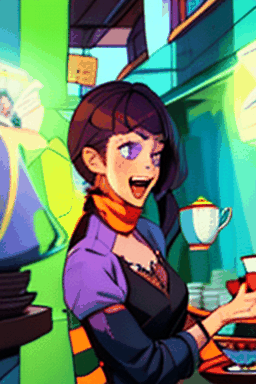

In [13]:
from IPython.display import display, Image

# Display the image
print(gif)
display(Image(filename=str(gif)))